In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Relational Classification Plots on Synthetic Networks</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, '_mixed_effects')
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = Inference.get_all_results_as_dataframe(OUTPUT, kind, sampling=sampling, njobs=30, verbose=False)
df_results_original.shape

(58161, 20)

In [5]:
df_results_original.query("kind == 'BAH'").shape

(57761, 20)

In [6]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head(10) 

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
0,BAH,500,20,0.5,0.0,5,5,nodes,0.70,1,492,9372,20,1.0,0.0,1.0,1.0,0.5,645.406400,"N500, m20"
1,BAH,500,20,0.5,0.0,5,5,nodes,0.70,10,492,9372,20,1.0,0.0,1.0,1.0,0.5,614.283562,"N500, m20"
2,BAH,500,20,0.5,0.0,5,5,nodes,0.05,8,492,9372,20,1.0,0.0,1.0,1.0,0.5,1905.948831,"N500, m20"
3,BAH,500,20,0.5,0.0,5,5,nodes,0.05,7,492,9372,20,1.0,0.0,1.0,1.0,0.5,1925.887763,"N500, m20"
4,BAH,500,20,0.5,0.0,5,5,nodes,0.30,6,492,9372,20,1.0,0.0,1.0,1.0,0.5,1526.674176,"N500, m20"
5,BAH,500,20,0.5,0.0,5,5,nodes,0.20,10,492,9372,20,1.0,0.0,1.0,1.0,0.5,1627.797999,"N500, m20"
6,BAH,500,20,0.5,0.0,5,5,nodes,0.40,4,492,9372,20,1.0,0.0,1.0,1.0,0.5,1328.862428,"N500, m20"
7,BAH,500,20,0.5,0.0,5,5,nodes,0.05,10,492,9372,20,1.0,0.0,1.0,1.0,0.5,2158.834721,"N500, m20"
8,BAH,500,20,0.5,0.0,5,5,nodes,0.90,7,492,9372,20,1.0,0.0,1.0,1.0,0.5,202.966452,"N500, m20"
9,BAH,500,20,0.5,0.0,5,5,nodes,0.40,8,492,9372,20,1.0,0.0,1.0,1.0,0.5,1257.350407,"N500, m20"


<h2>--- RQ1 ---</h2>

In [7]:
df_rq1 = df_results.query("kind=='BAH' & sampling=='nodes'")
df_rq1.head()

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
0,BAH,500,20,0.5,0.0,5,5,nodes,0.70,1,492,9372,20,1.0,0.0,1.0,1.0,0.5,645.406400,"N500, m20"
1,BAH,500,20,0.5,0.0,5,5,nodes,0.70,10,492,9372,20,1.0,0.0,1.0,1.0,0.5,614.283562,"N500, m20"
2,BAH,500,20,0.5,0.0,5,5,nodes,0.05,8,492,9372,20,1.0,0.0,1.0,1.0,0.5,1905.948831,"N500, m20"
3,BAH,500,20,0.5,0.0,5,5,nodes,0.05,7,492,9372,20,1.0,0.0,1.0,1.0,0.5,1925.887763,"N500, m20"
4,BAH,500,20,0.5,0.0,5,5,nodes,0.30,6,492,9372,20,1.0,0.0,1.0,1.0,0.5,1526.674176,"N500, m20"


<h3>Network structure vs. Global performance</h3>

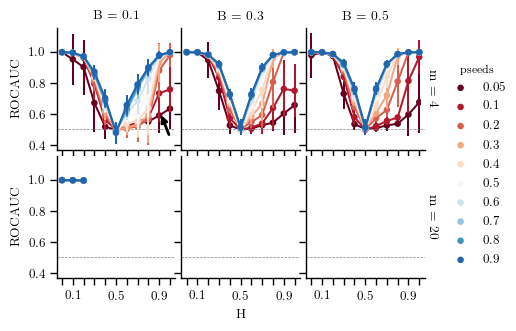

In [8]:
fn = None
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==2000"), columns, fn=fn)

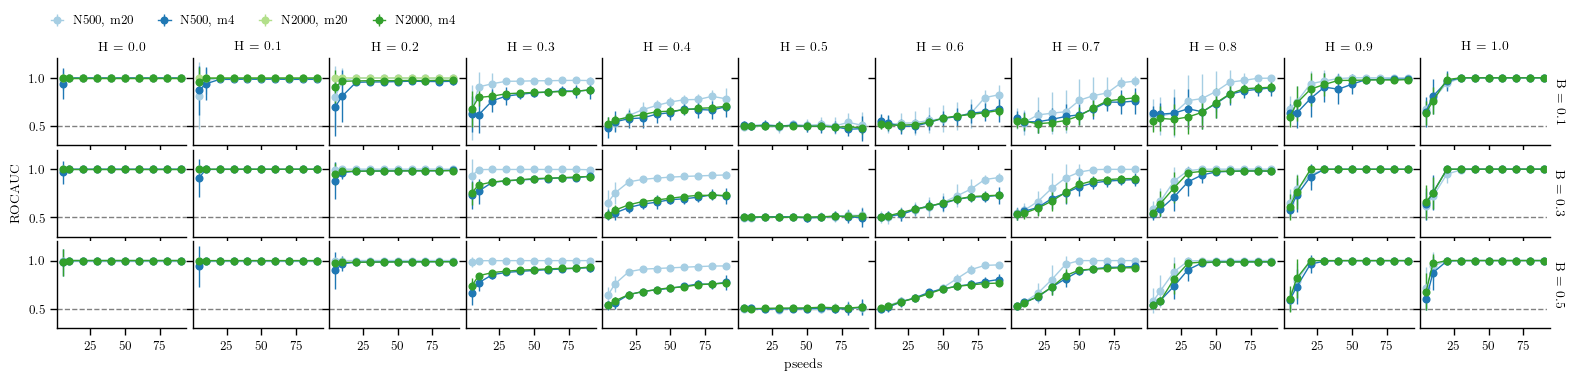

In [9]:
fn = None
viz.plot_rocauc_vs_pseeds_per_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [10]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/y_observed.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/fe_params.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/random_effects.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/mdf.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/X.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/Y.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/Z.pickle loaded!


In [11]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: rocauc   
No. Observations: 1020    Method:             REML     
No. Groups:       110     Scale:              0.0025   
Min. group size:  9       Likelihood:         1313.7918
Max. group size:  10      Converged:          Yes      
Mean group size:  9.3                                  
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.751    0.018 41.854 0.000  0.716  0.787
N             0.000    0.000  2.634 0.008  0.000  0.000
m             0.003    0.000 14.312 0.000  0.003  0.004
B             0.147    0.010 15.256 0.000  0.128  0.166
Group Var     0.032    0.093                           
=======================================================

"""

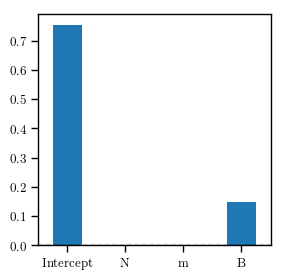

In [12]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

In [13]:
fn = None
viz.plot_random_effects(random_effects, columns, fn)

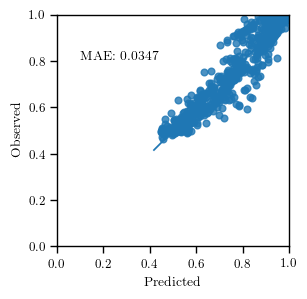

In [14]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

The MSE of LMM is 0.002256740257297534
The RMSE of LMM is 0.047505160322827394
The MAE of LMM is 0.034686402585493846


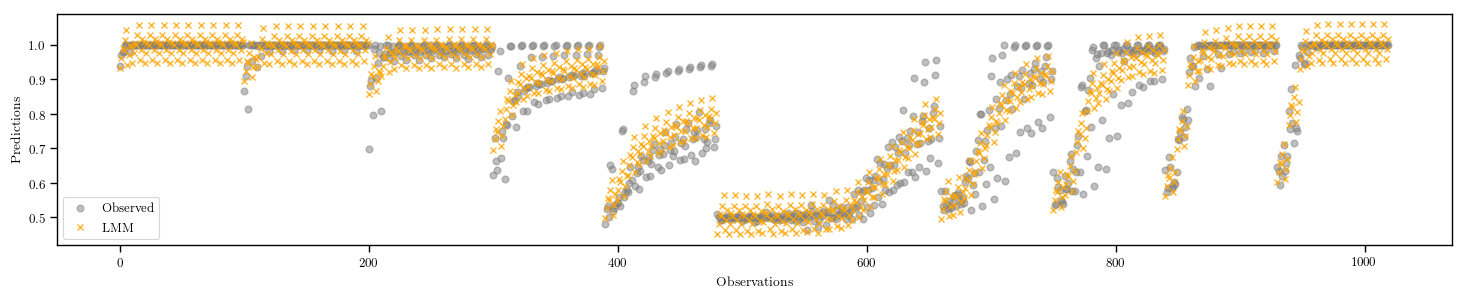

In [15]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Real World vs. Model</h3>

<h2>--- RQ2 ---</h2>

In [16]:
df_rq2 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8]")
df_rq2.head()

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
1298,BAH,2000,4,0.5,0.2,4,5,neighbors,0.70,1,2000,7984,4,0.988367,0.083195,0.905956,0.929078,0.493700,309.996891,"N2000, m4"
1299,BAH,2000,4,0.5,0.2,4,5,neighbors,0.70,10,2000,7984,4,0.986714,0.081531,0.934426,0.902027,0.508821,311.783790,"N2000, m4"
1300,BAH,2000,4,0.5,0.2,4,5,neighbors,0.05,8,2000,7984,4,0.982607,0.086842,0.941053,0.885263,0.515274,1182.380134,"N2000, m4"
1301,BAH,2000,4,0.5,0.2,4,5,neighbors,0.05,7,2000,7984,4,0.984381,0.113158,0.883648,0.890063,0.498191,1181.770397,"N2000, m4"
1302,BAH,2000,4,0.5,0.2,4,5,neighbors,0.30,6,2000,7984,4,0.983301,0.097074,0.929972,0.874818,0.515280,777.383543,"N2000, m4"


<h3>Global performance</h3>

In [ ]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)

<h3>Quality of estimates</h3>

<h3>Utility of estimates</h3>

<h2>--- RQ3 ---</h2>

In [17]:
df_rq3 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8] and pseeds < .4")
df_rq3.head()

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
1300,BAH,2000,4,0.5,0.2,4,5,neighbors,0.05,8,2000,7984,4,0.982607,0.086842,0.941053,0.885263,0.515274,1182.380134,"N2000, m4"
1301,BAH,2000,4,0.5,0.2,4,5,neighbors,0.05,7,2000,7984,4,0.984381,0.113158,0.883648,0.890063,0.498191,1181.770397,"N2000, m4"
1302,BAH,2000,4,0.5,0.2,4,5,neighbors,0.30,6,2000,7984,4,0.983301,0.097074,0.929972,0.874818,0.515280,777.383543,"N2000, m4"
1303,BAH,2000,4,0.5,0.2,4,5,neighbors,0.20,10,2000,7984,4,0.984261,0.083125,0.915935,0.917808,0.499489,939.969770,"N2000, m4"
1305,BAH,2000,4,0.5,0.2,4,5,neighbors,0.05,10,2000,7984,4,0.979981,0.108890,0.943277,0.838778,0.529320,1188.641651,"N2000, m4"


<h3>Fairness</h3>

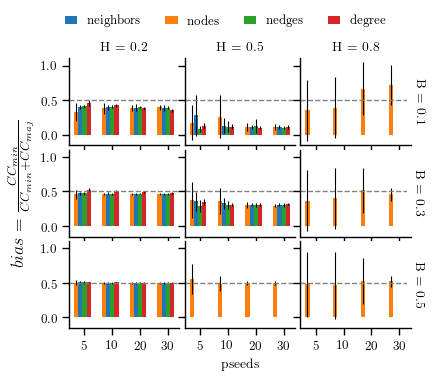

In [18]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)